# Supervised Learning with Scikit Learn

This notebook contains information about Supervised Machine Learning and specifically how to perform Supervised Machine Learning with the framework Scikit Learn.

This notebook with cover the following:

* Introduction to Supervised Machine Learning
* Environment Setup
* Supervised Classification
* Supervised Regression
* How to tune a model
* How to preprocess data
* Model Pipelines

This information is meant as an introduction to the topic.  Not all aspects of machine learning, nor all of the Scikit-Learn models will be covered.  However, by the end you should be comfortable performing machine learning and continuing your Machine Learning journey.

Machine Learning can be further divided into *Deep Learning* and *Shallow Learning*.  

* **Deep Learning**
Deep Learning is a branch of machine learning that involved neural networks that can figure out on their own the optimal parameters and weights to achieve the best performance of the model 


* **Shallow Learning**
Shallow learning involves algorithms that a Data Scientist or Machine Learning Engineer must assist in the tuning of hte algorithm to achieve the best performance.

This notebook focuses on Shallow Supervised Learning for classification and regression problems.

**<font size="3">Scikit-learn Models</font>**

All machine learning models implemented as Python class.

The models implement the algorithm for learning and predicting.  Every model has the same programatic API, meaning you can easily swap one model for another to see how each model performs

## Introduction to Supervised Machine Learning

### What is machine learning, and how does it work?

From, Andreas Muller (Author of Scikit-Learn framework):

"Machine learning is the art and science of giving computers the ability to learn to make decisions from data... *without* the being explicitly programmed."

From Drew Conway:

[Data Science Venn Diagram](http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram)

![DataScience Venn Diagram](images/DS_Venn_Diagram.png)

### What are the three main categories of machine learning?

* **Supervised Learning**
* **Unsupervised Learning**
* **Reinforcement Learning**



**Supervised learning**: Making predictions using labeled data

Used for Classification and Regression
    
- Example: Is a given email "spam" or "ham"?
- There is an outcome we are trying to predict

![Spam filter](images/01_spam_filter.png)

**Unsupervised learning**: Extracting structure from data

Used for Clustering

- Example: Segment grocery store shoppers into clusters that exhibit similar behaviors
- There is no "right answer"
- uncovers hidden patterns from unlabeled data

![Clustering](images/01_clustering.png)

### What are the two main types of Supervised machine learning?

#### Classification

Target variables consist of categories. 
* Ham / Spam Email
* Flower Species
* Fraud / Not Fraud

#### Regression

Target variable is continous
* Home price
* Salary
* Weight

Regression can be further broken down into Linear and Non-Linear regression

### Supervised Machine Learning 

Uses known outcomes, also known as targets or labels.  

Uses features or attributes about something, such as flower attributes and the target is the kind of flower.

High-level steps of **supervised learning**:

1. Gather and Clean Data

2. Feature Selection
    - A feature is typically a column in a data set
    - What data is relevant to question trying to be answered
    - Some features just add noise and actually produce worse accuracy

3. Select Machine Learning Model / Algorithm
    - Different algorithms have very different prediction characteristics
    - You will likely try many different kinds of Machine Learning Algorithms and determine the best one

4. First, train a **machine learning model** using **labeled data**

    - "Labeled data" has been labeled with the outcome
    - "Machine learning model" learns the relationship between the attributes of the data and its outcome

5. Then, make **predictions** on **new data** for which the label is unknown

## Environment Setup

**Install Python 3.6.x**
This notebook assumes Python 3.6.x and has not been tested with Python 3.7.x 

**Create a Python Virtual Environment**
There are numerous ways to do this.  For MacOS you can do the following:

Create a directory to hold your project code and cd into that directory

`python3 -m venv venv`

`source venv/bin/activate`

on Windows run:

`\venv\Scripts\activate.bat`

**Install Python libraries**
* pip install scipy
* pip install numpy
* pip install scikit-learn
* pip install jupyter
* pip install matplotlib
* pip install pandas
* pip install seaborn

`pip install scipy numpy scikit-learn jupyter matplotlib pandas`


If you would like to run examples in the Jupyter notebook, you can execute:

`jupyter notebook`

### Test Installation

Run the following cell to make sure it executes.  This is also a quick look at how a machine learning model is created and tested.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Load the data
iris_dataset = load_iris()
X = iris_dataset['data']
y = iris_dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12,stratify=y)

# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model
knn.fit(X_train, y_train)

# Score the model on the unseen test data set
score = knn.score(X_test, y_test)
print(f"Testing Score: {score}")

# Predict on new data
new_data = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(new_data)
print(f"Prediction: {prediction[0]}")
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Testing Score: 0.9210526315789473
Prediction: 0
Predicted target name: ['setosa']


If the above works you should see output like:
```
Testing Score: 0.9210526315789473
Prediction: 0
Predicted target name: ['setosa']
```

## Classification Models

### Getting started with the famous Iris dataset

<font size="3">Iris Dataset</font>

![Iris](images/03_iris.png)

- 50 samples of 3 different species of iris (150 samples total)
- Measurements: sepal length, sepal width, petal length, petal width

Supervised Learning Problem:

Predict the species of an Iris using the measurements

### Library Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [3]:
# Load the iris dataset from scikit-learn
iris = datasets.load_iris()

In [4]:
type(iris)

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Features are in data
Labels are in targets

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
set(iris.target)

{0, 1, 2}

In [8]:
# Use Pandas to read the data into a Pandas Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
# Display every 30th value
df[::30]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
30,4.8,3.1,1.6,0.2,0
60,5.0,2.0,3.5,1.0,1
90,5.5,2.6,4.4,1.2,1
120,6.9,3.2,5.7,2.3,2


Traditionally the features are stored in a variable called X (capital X) and the target values are stored in a variable called y (lowercase y).

This is to reflect the:

f(X) = y 

notation.

f(sepal length, sepal width, petal length, petal width) = target

In [9]:
# store feature matrix in "X"
# X is 150 sample rows by 4 feature columns
X = iris.data

# store response vector in "y"
# Y is 150 target values
y = iris.target

### Visualize the data

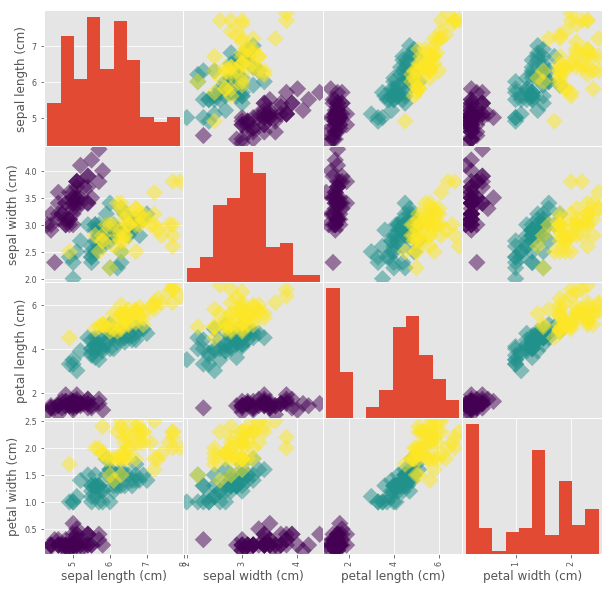

In [10]:
# c=y, will color the points based on the specifies
_=pd.plotting.scatter_matrix(pd.DataFrame(X,columns=iris.feature_names), c=y, figsize=[10,10], s=150, marker='D')

### K-Nearest Neighbors (KNN) machine learning classification model

K-nearest neighbors, or K-NN, is a simple form of supervised learning. It assigns an output label to a new input example x based on it's closest neighboring datapoints. The number K is the number of data points to use. 

For K=1, x is assigned the label of the closest neighbor. If K>1, the majority vote is used to label x.

The code in this tutorial is slightly modified from the scikit-learn [K-NN example](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py). There is also information on the K-NN classifier function [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

1. Pick a value for K. 'k' is the number of neighbors to consider
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

### Visualize how KNN works with example training data

![Training data](images/04_knn_dataset.png)

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

### scikit-learn 4-step modeling pattern

#### **Step 1:** Import the class you plan to use

In [11]:
from sklearn.neighbors import KNeighborsClassifier

#### **Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name (e.g. knn ) of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [13]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')


- weights can be uniform or scaled based on the distance.  closer points have more impact.
 - metric, [DistanceMetric](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html) can be a number of different distance calculations.

#### **Step 3:** Fit the model with data (aka "model training")

- Training a model on the data = 'fitting' a model using the .fit() method
- Model is learning the relationship between X and y
- Occurs in-place

In [14]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

#### **Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [15]:
# syntax might look a little wierd.
# a collection of observations
# i.e.: an array of arrays
predictions = knn.predict([[3, 5, 4, 2]])
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 2 or virginica


- Returns a NumPy array
- Can predict for multiple observations at once

In [16]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
predictions = knn.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 2 or virginica
Predicted Iris type: 1 or versicolor


**Using a different value for K**

What if we use a different value for 'k' or the number of neighbors to consider.

From above, we see that changing the 'k' value, changes the predicted areas.



In [17]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
predictions = knn.predict(X_new)
for prediction in predictions:
    print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction]}")

Predicted Iris type: 1 or versicolor
Predicted Iris type: 1 or versicolor


## Model Performance / Train Test Split

In classification accuracy is a common metric used to measure a models performance.

Accuracy = fraction of correct predictions. 

For example:  98 correct predictions / 100 known values

The question is what data should be used for training and what data should be used testing.

Model performance should only ever be measured on data that the model **did not** train with.  


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

Green line shows the results of a model that **overfits** the data.  The model has learned the 'noise' in the data.

The black line generalizes the data, and depending upon the desired outcome, may provide a better result.

![Overfitting](images/05_overfitting.png)


This is where the **train, test split** comes in.

**Train Test Split**

- Split the data into a training dataset and a testing dataset

- Fit/Train the model on the training set

- Predict on the labeled test set

![train test split](images/train_test_split.svg)

### Train Test Split Code Example

In [18]:
# split X and y into training and testing sets
# default test_size is 25%
# stratify - distribute the target values in the same 
#            proportion as in the original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4, stratify=y)

In [19]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X shape: (150, 4)
y shape: (150,)
X_train shape: (90, 4)
X_test shape: (60, 4)
y_train: (90,)
y_test: (60,)


In [20]:

# fit the model with data
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
print(f'Testing accuracy score: {score}')

# predict the response for new observations
predictions = knn.predict(X_test)
for prediction in list(zip(y_test,predictions)):
    if prediction[0] != prediction[1]:
        print(f"Predicted Iris type: {prediction} or {iris.target_names[prediction[0]]},{iris.target_names[prediction[1]]}")

Testing accuracy score: 0.9666666666666667
Predicted Iris type: (1, 2) or versicolor,virginica
Predicted Iris type: (1, 2) or versicolor,virginica


Can we locate an even better value for K?

In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Testing Accuracy')

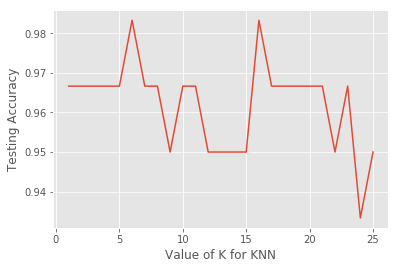

In [22]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

For a KNN model, higher values of 'k' lead a more generalized model so you would want to pick the highest value of 'k' with the best testing accuracy.

#### Decision Tree Example

Provide another example of a Scikit-Learn classifier, using a default DecisionTreeClassifier.

Notice it has the same 'estimator' interface as KNN model, as do all Scikit-learn models.

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier()

In [25]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
tree.score(X_test, y_test)

0.9833333333333333

## Linear Regression Models


Linear models make a prediction based on a linear equation. The 'best' linear equation is determined from the input features, by minimizing the *mean squared error* also called the *Loss Function*.

Linear Regression Loss Function = mean squared error

The general form a linear equation is:

y = mx + b

Where:
- m is the slope
- b is the y-intercept

The general form of a linear equation used for predictions with multiple features is:

**<font size="3">General form of linear regression</font>**

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV Sales + \beta_2 \times Radio Sales + \beta_3 \times Newspaper Sales$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!


In the standard LinearRegression model, the coefficients are determined such that the **mean squared error** is minimized between the predictions and the known true target values. 

Linear Regression models can be used for both supervised:
- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response



This notebook will look at the following Linear Regression Models from scikit-learn.

- LinearRegression
- Ridge
- Lasso

This notebook will **not** describe *PolynomialFeatures* preprocessing class to provide a high order non-linear equation.  If the data is not linear, you can use *PolynomialFeatures* to create a non-linear higher order equation to fit the data.

### Simple Linear Regression

Create a scatter plot of the simple linear equation:

*y = 2x - 5*

In [27]:
rng = np.random.RandomState(1)
x = 10*rng.rand(50)  # generate 50 random numbers between 0 and 10  rng.rand produces numbers 0 to 1
# randn: “normal” (Gaussian) distribution of mean 0 and variance 1 
y = 2*x - 5 + rng.randn(50) # create y with a slope of 2, intercept -5, 50 times with some noise

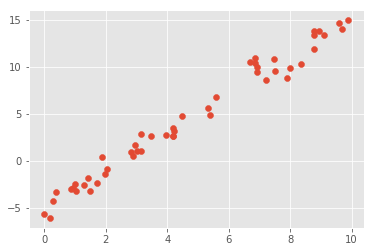

In [28]:
plt.scatter(x,y)

Use the Scikit-Learn *LinearRegression* estimator to construct a best fit line making 1000 predictions from an input value for *x*.

Create a standard LinearRegression model

In [29]:
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression(fit_intercept=True)
# x[:, np.newaxis] this says to create a Series with all of the rows and a new column (series)
linear_regression_model.fit(x[:, np.newaxis],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Create 1000 new x values to use to predict a y value.

In [30]:
# create 1000 datapoints from 0 to 10 as an array
x_input_values = np.linspace(0,10,1000) 

# x_input_series is now a series, same as x_input_values.reshape(-1,1)
x_input_series = x_input_values[:, np.newaxis] 

For the 1000 new x values, predict the set of y values

In [31]:
y_predicted = linear_regression_model.predict(x_input_series)

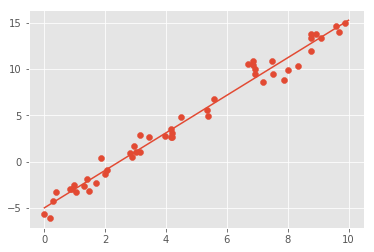

In [32]:
plt.scatter(x,y)
# plot a line of all of the predicted 'y' values from the 1000 'x' values provided to the model
plt.plot(x_input_series, y_predicted)

In [33]:
print(f"Model slope: {linear_regression_model.coef_[0]}")
print(f"Model intercept: {linear_regression_model.intercept_}")
print("y = 2x - 5")

Model slope: 2.0272088103606953
Model intercept: -4.998577085553204
y = 2x - 5


### Linear Regression with Boston Housing Data

In [34]:
boston = pd.read_csv('./data/boston_housing.csv')

In [35]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Target value is MEDV, median house value in 1000s of dollars

First create the features and the target data arrays

In [36]:
X = boston.drop(columns=['MEDV'])
y = boston['MEDV']

Use train_test_split to divide the data between a Training and a Testing dataset

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
linear_regression_model = LinearRegression()

In [39]:
linear_regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The score method of a LinearRegression model is the coefficient of determination R^2 of the prediction.  A value closer to 1.0 is a better model.

In [40]:
linear_regression_model.score(X_test, y_test)

0.7112260057484929

### Regularization

Regularization is a way to handle overfitting by keeping the coefficients to the linear equation from getting too big, and sometimes the coefficients can be regularized to zero.  This is a way of reducing the complexity of a model, and therefore you will reduce the chance of overfitting.

Regularization penalizes large coefficients.

There is two types of regularization:

#### L1 Regularization ( Lasso )
This type of regularization attempts to minimize the sum of the absolute values of the coefficients.

L1 regularization—penalizing the absolute value of all the weights—turns out to be quite efficient for wide models

We can use L1 regularization to encourage many of the uninformative coefficients in our model to be exactly 0

    alpha * Sum(AbsoluteValue(coeficient))
    
Lasso Regression Loss Function = mean squared error + alpha * Sum(AbsoluteValue(coeficient))


#### L2 Regularization (Ridge)
This type of regularization attempts to minimuze the sum of the squares of the coefficients. 

L2 regularization encourages weights to be small, but doesn't force them to exactly 0.0.
 
    alpha * Sum(coefficient^2)
    
Ridge Regression Loss Function = mean squared error + alpha * Sum(coefficient^2)


Both models take a parameter alpha that controls the complexity of the model.  As the alpha approaches zero, the model becomes more like the general LinearRegression model.  As alpha grows, all model responses are suppressed.


L2 and L1 penalize weights differently:

- L2 penalizes weight^2.

- L1 penalizes |weight|.

Consequently, L2 and L1 have different derivatives:

The derivative of L2 is 2 * weight.

The derivative of L1 is k (a constant, whose value is independent of weight).

You can think of the derivative of L2 as a force that removes x% of the weight every time. L2 does not normally drive weights to zero.

You can think of the derivative of L1 as a force that subtracts some constant from the weight every time. However, thanks to absolute values, L1 has a discontinuity at 0, which causes subtraction results that cross 0 to become zeroed out. For example, if subtraction would have forced a weight from +0.1 to -0.2, L1 will set the weight to exactly 0. Meaning, L1 zeroed out the weight.


##### Note
According to DataCamp:
"Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice."

Using L1, and viewing the zero coefficients will indicate the features that do not impact the model results.


#### Choosing alpha
Choosing the best alpha is part of Hyperparameter tuning section


### Lasso Regression

In [41]:
from sklearn.linear_model import Lasso

In [42]:
# normalize=True
# makes sure that all features are on the same scale
lasso = Lasso(alpha=0.1, normalize=True)

In [43]:
lasso_coef = lasso.fit(X,y)

In [44]:
lasso_coef.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        2.95469455, -0.        ,  0.        , -0.        , -0.        ,
       -0.24795837,  0.        , -0.42817439])

In [45]:
list(zip(lasso_coef.coef_, X.columns))

[(-0.0, 'CRIM'),
 (0.0, 'ZN'),
 (-0.0, 'INDUS'),
 (0.0, 'CHAS'),
 (-0.0, 'NX'),
 (2.9546945549935293, 'RM'),
 (-0.0, 'AGE'),
 (0.0, 'DIS'),
 (-0.0, 'RAD'),
 (-0.0, 'TAX'),
 (-0.24795837092031373, 'PTRATIO'),
 (0.0, 'B'),
 (-0.4281743894034839, 'LSTAT')]

In [46]:
X.columns.tolist()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

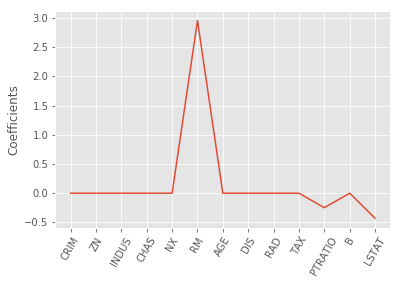

In [47]:
_ = plt.plot(range(len(X.columns.tolist())), lasso_coef.coef_)
_ = plt.xticks(range(len(X.columns.tolist())), X.columns.tolist(), rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

Shows that the number of rooms is the most important feature to home price prediction

### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

In [49]:
# normalize=True
# makes sure all features are on the same scale
ridge = Ridge(alpha=0.1, normalize=True)

In [50]:
ridge_coef = ridge.fit(X,y)

In [51]:
ridge_coef.coef_

array([-8.39972182e-02,  3.01457989e-02, -4.51085108e-02,  2.91942377e+00,
       -1.07499818e+01,  4.02329138e+00, -4.56047447e-03, -1.03180235e+00,
        1.30441043e-01, -4.95778250e-03, -8.32529832e-01,  8.96754880e-03,
       -4.57771753e-01])

In [52]:
list(zip(ridge_coef.coef_, X.columns))

[(-0.08399721822803638, 'CRIM'),
 (0.030145798924530707, 'ZN'),
 (-0.04510851075272272, 'INDUS'),
 (2.9194237660043862, 'CHAS'),
 (-10.749981827139809, 'NX'),
 (4.023291380660406, 'RM'),
 (-0.0045604744735993075, 'AGE'),
 (-1.0318023475535174, 'DIS'),
 (0.13044104282635283, 'RAD'),
 (-0.004957782498087585, 'TAX'),
 (-0.8325298316349675, 'PTRATIO'),
 (0.008967548801025068, 'B'),
 (-0.45777175268504405, 'LSTAT')]

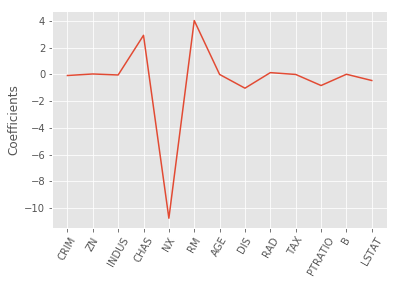

In [53]:
_ = plt.plot(range(len(X.columns.tolist())), ridge_coef.coef_)
_ = plt.xticks(range(len(X.columns.tolist())), X.columns.tolist(), rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

## Data Preparation

### Null or Missing Values

How do you handle data from a dataset that is missing, or perhaps provided but not zeroed out?

Look at the diabetes dataset.

In [54]:
df = pd.read_csv('./data/diabetes.csv')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        768 non-null int64
insulin        768 non-null int64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataframe contains values for rows, but looking at the actual data reveals that some values are zero.  Zero for insulin, and triceps (thickness of skin) really indicate a missing value where zero preganancies is a valid value.  You understand the data you are working with.

In [56]:
df.head(5)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Use numpy's 'nan' to replace 0 values with NaN

In [57]:
df.insulin.replace(0, np.nan, inplace=True)

df.triceps.replace(0, np.nan, inplace=True)

df.bmi.replace(0, np.nan, inplace=True)

print(df.info())

print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnancies    768 non-null int64
glucose        768 non-null int64
diastolic      768 non-null int64
triceps        541 non-null float64
insulin        394 non-null float64
bmi            757 non-null float64
dpf            768 non-null float64
age            768 non-null int64
diabetes       768 non-null int64
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None
   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72     35.0      NaN  33.6  0.627   50   
1            1       85         66     29.0      NaN  26.6  0.351   31   
2            8      183         64      NaN      NaN  23.3  0.672   32   
3            1       89         66     23.0     94.0  28.1  0.167   21   
4            0      137         40     35.0    168.0  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

Now we can see missing values.  

How to handle the missing values:

- Drop the values, which is generally not a great idea

- impute a value by taking the mean or median or most frequent values.

In [58]:
from sklearn.impute import SimpleImputer
# strategy could be:
#         allowed_strategies = ["mean", "median", "most_frequent", "constant"]
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


In [59]:
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Notice the fit/transform methods which will allow for usage in a pipelines 
# discussed later

imp.fit(X)

X_transformed = imp.transform(X)

df_new = pd.DataFrame(X_transformed, columns=X.columns)

print(df_new.info())

print(df_new.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
pregnancies    768 non-null float64
glucose        768 non-null float64
diastolic      768 non-null float64
triceps        768 non-null float64
insulin        768 non-null float64
bmi            768 non-null float64
dpf            768 non-null float64
age            768 non-null float64
dtypes: float64(8)
memory usage: 48.1 KB
None
   pregnancies  glucose  diastolic   triceps     insulin   bmi    dpf   age
0          6.0    148.0       72.0  35.00000  155.548223  33.6  0.627  50.0
1          1.0     85.0       66.0  29.00000  155.548223  26.6  0.351  31.0
2          8.0    183.0       64.0  29.15342  155.548223  23.3  0.672  32.0
3          1.0     89.0       66.0  23.00000   94.000000  28.1  0.167  21.0
4          0.0    137.0       40.0  35.00000  168.000000  43.1  2.288  33.0


### Scaling Feature Values

Many Machine Learning algorithms do not handle data with features that are on different scales and ranges of values.  

It is generally best to make sure all features are on a similar range - called normalizing.

Standardization - subtract the mean and divide by the variables.

There are many different ways in Scikit-learn to normalize data.

Use Scikit-learn StandardScaler which standardizes features by removing the mean and scaling to unit variance


In [60]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


df = pd.read_csv('./data/red_wine_quality.csv', sep=';')

In [61]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [62]:
X = df.drop(columns=['quality'])
y = df['quality']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [63]:
df_new = pd.DataFrame(X_scaled, columns=X.columns)

df_new.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


#### KNN Scaled vs Unscaled performance

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score


df = pd.read_csv('./data/red_wine_quality.csv', sep=';')

X = df.drop(columns=['quality'])
y = df['quality']

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(f'Unscaled Accuracy: {accuracy_score(y_test, y_pred)}')

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

knn_scaled = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

print(f'Scaled Accuracy: {accuracy_score(y_test, y_pred)}')




Unscaled Accuracy: 0.49375
Scaled Accuracy: 0.61875


### OneHotEncoding of Categorical Feature Values

Scikit-learn models need to have numeric values to operate on.  Categorical values such as strings, region = ['Asia', 'America', 'Europe'] need to be encoded as numbers.

The way to handle this is to divide the values into binary values, called dummy variables also known as 'OneHotEncoding'.

There are a couple of solutions to this problem:

1) Use the pandas *get_dummies* function.  

This is easy and straight forward but it cannot be used in a modeling pipeline ( discussed below )

2) Use the Scikit-Learn *OneHotEncoder* 

However, this class requires the usage of *LabelEncoder* to turn the labels into numbers, before the *OneHotEncoder* can encode it.  

This area of data preparation seems to be a little tricky.

I have found a blog post that has created a custom transformer to wrap the Pandas *get_dummies*:

[MasonGallo CategoricalWarrior](https://masongallo.github.io/machine/learning,/python/2017/10/07/machine-learning-pipelines.html)

In [65]:
df = pd.DataFrame(['Asia', 'Asia', 'America', 'Europe','America'], columns=['Region'])
df.head()

,Region
0,Asia
1,Asia
2,America
3,Europe
4,America


In [66]:
df = pd.DataFrame([[1,0,0],
                   [1,0,0],
                   [0,1,0],
                   [0,0,1],
                   [0,1,0]], columns=['Region_Asia', 'Region_America', 'Region_Europe'])
df.head()

,Region_Asia,Region_America,Region_Europe
0,1,0,0
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


Once the values are encoded, you can actually remove one as if it is not any of the remaining then it is implied to be the removed value.  This is not necessary but it can help reduce model complexity by removing features that have no additional information.

There are a couple of ways to one hot encode, using Pandas is one convenient way.

In [67]:
df = pd.DataFrame(['Asia', 'Asia', 'America', 'Europe','America'], columns=['Region'])
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Region_America,Region_Asia,Region_Europe
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


## Model Tuning

### Model Evaluation Metrics

- **Regression problems:** Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
- **Classification problems:** Classification accuracy

This section covers:
- Accuracy
- confusion matrix
- ROC/AUC Curves



#### Classification Accuracy

The number of correct classifications divided by the total.

This metric does not always tell the entire story.  

**<font size="3">Imbalanced Data Sets</font>**

If we are trying to detect Spam emails, and our data set has 99% true emails and 1% spam emails and we always predict true emails, then our model will have an accuracy of 99%.  

Which seems great - except - we **never** predict spam email.  Classification accuracy also does not tell you what type of errors the model is making.

Datasets with class imbalance are frequent and there are other measures to consider.

**<font size="3">Confusion Matrix</font>**

![Small confusion matrix](./images/09_confusion_matrix_1.png)

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

![Large confusion matrix](images/09_confusion_matrix_2.png)

- Classification Accuracy = (TP+TN)/(TP+TN+FP+FN)

- Recall/Sensitivity : When the actual value is positive, how often is the prediction correct

recall = TP/(TP+FN)

FP |recall threshold| FN

The higher the recall value, closer to 1, then fewer false negatives are predicted

- Precision: When a positive value is predicted, how often is the actual value positive, or how often is the prediction correct.

precision = TP /(TP+FP)

The higher the precision, closer to 1, then fewer false positives are predicted

It is a balance between precision and recall and how you balance depends upon the problem.

**Conclusion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

Scikit-learn has the following function to measure classification accuracy

- classification_report(y_test, y_predicted)

The classification report will provide precision, recall, f1 and other metrics.

- accuracy_score(y_test, y_predicted)



#### Helper function to pretty print the confusion matrix

In [68]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


df = pd.read_csv('./data/red_wine_quality.csv', sep=';')

X = df.drop(columns=['quality'])
y = df['quality']

print(f'Possible quality values: {y.unique()}')
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

knn = KNeighborsClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

knn_scaled = KNeighborsClassifier().fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)

print(f'Scaled Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Classification Report:\n {classification_report(y_test, y_pred)}')
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')
print_cm(cm, ['3','4','5','6','7','8'])



Possible quality values: [5 6 7 4 8 3]
Scaled Accuracy: 0.61875
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.06      0.11        16
           5       0.63      0.74      0.68       127
           6       0.62      0.63      0.62       131
           7       0.62      0.50      0.55        42
           8       0.00      0.00      0.00         3

   micro avg       0.62      0.62      0.62       320
   macro avg       0.37      0.32      0.33       320
weighted avg       0.60      0.62      0.60       320

Confusion Matrix:
[[ 0  0  1  0  0  0]
 [ 0  1  8  7  0  0]
 [ 0  1 94 31  1  0]
 [ 0  1 38 82 10  0]
 [ 0  0  9 12 21  0]
 [ 0  0  0  1  2  0]]
     t/p      3     4     5     6     7     8 
        3   0.0   0.0   1.0   0.0   0.0   0.0 
        4   0.0   1.0   8.0   7.0   0.0   0.0 
        5   0.0   1.0  94.0  31.0   1.0   0.0 
        6   0.0   1.0  38.0  82.0  1

/Users/patrickryan/Development/python/mygithub/supervised-machine-learning-with-scikit-learn/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### ROC Curves and Area Under the Curve (AUC)

- Receiver Operating Curve

- Area under the Curve ( ROC )

**Question:** Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?

**Answer:** Plot the ROC curve!

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).


The ROC/AUC uses the predict_proba values from a Binary Classifier.


#### ROC/AUC LogisticRegression Examples

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('./data/diabetes.csv')
X = df.drop(columns=['diabetes'])
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=11)
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

y_pred_prob = logreg.predict_proba(X_test)


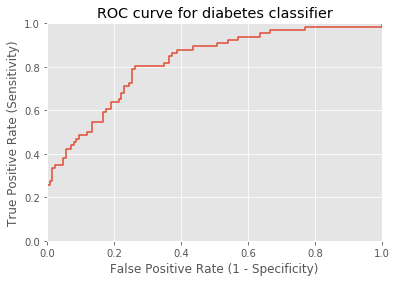

In [71]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
# y_pred_prob[:,1] = predicted probabilities for the '1' class or predicted cancer
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [72]:
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.81998556998557


### Cross Validation

#### Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Train/test split**

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

<font size="3">Problems with Train/Test Split</font>

- Provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

- The reason for **high variance** is that *train-test-split* takes one random sample of the data to perfom the split

- The next time you run *train-test-split* you will get a new data set and a new accuracy
  
- To get a better idea of how a model performs, you would want to take many samples to train and test on.




#### K-Fold Cross Validation

Cross-validation is a statitical method of evaluating generalization performance of a model, that is more accurate than just train_test_split.

K-Fold Cross Validation will split a dataset up into a number of different training sets and testing sets to provide you with a better idea of how the model will generalize to unseen data.  

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

#### 5-Fold cross validation

<font size="3">Cross-validation for more robust estimates<font>


![cross-validation](./images/cross_validation.svg)

- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

Instead of using Scikit-learn's *train_test_split* we can use *cross_val_score*.

#### K-Fold Cross Validation Example

In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


"""
Linear Regression

predict life expectancy in a given country based on features such as GDP

"""

df = pd.read_csv('./data/gapminder.csv')
y = df['life']
# remove life as that this the target
# remove Region as that is not numeric
X = df.drop(columns=['life', 'Region'])

print(y.shape)
print(X.shape)

# Create the regressor: reg_all
reg = LinearRegression()

cv_scores = cross_val_score(reg, X, y, cv=5 )
print(cv_scores)
print("Average R^2 5-Fold CV Score: {}".format(np.mean(cv_scores)))


(139,)
(139, 8)
[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average R^2 5-Fold CV Score: 0.8599627722793229


CrossValidation gives us a better idea of how the model behaves across the entire dataset.

#### Hold Out Set with train_test_split and CrossValidation

CrossValidation is a great way to get a sense for how the model performs across the dataset.  However, we still want to measure the model performance on data that the model has never seen.

This is where the *hold out* dataset comes in.  To get a *hold out* dataset, we will use **train_test_split** and then call **cross_val_score** on the training dataset, and predict on the test set.

In [74]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score


"""
Linear Regression

predict life expectancy in a given country based on features such as GDP

"""

df = pd.read_csv('./data/gapminder.csv')
y = df['life']
# remove life as that this the target
# remove Region as that is not numeric
X = df.drop(columns=['life', 'Region'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Create the regressor: reg_all
reg = LinearRegression()

cv_scores = cross_val_score(reg, X_train, y_train, cv=5 )
print(cv_scores)
print("Average R^2 5-Fold CV Score: {}".format(np.mean(cv_scores)))

reg.fit(X_train, y_train)
print(f'Holdout R^2 score: {reg.score(X_test, y_test)}')

[0.83494035 0.83318648 0.85838446 0.91874003 0.83893236]
Average R^2 5-Fold CV Score: 0.8568367353176309
Holdout R^2 score: 0.8714304263480444


### GridSearchCV and Hyperparameter Tuning

How do you determine the best parameters for a model?  Some models have a large number of possible parameters.

This is where Scikit-learn's **GridSearchCV** comes into play.

<font size="3">GridSearchCV</font>

Allows use to define a grid of parameters that will be searched using K-Fold crossvalidation to determine the best set of possible parameters.  

This can be a very compute intensive operation, which is why we would like to specify a grid of all possible combinations for parameters, let it run, and come back later to see the results.

As we talked about above, you will want to create a hold-out dataset, and perform the *GridSearchCV* on the remaining training dataset.

#### GridSearchCV

This function will take a model, a parameter dictionary of all of the parameters to try and the cross fold to find the best combination of model parameters.

In this example, we are creating a parameter dictionary with just the *n_neighbors* parameter with the values 1 to 30.  GridSearchCV will use this to perform the model evaluation and find the best model based on the scoring parameter which we have set to *accuracy*

Recall that the *CrossValidation* will either be a StratifiedCrossValidation for Classification models, or a K-Fold CrossValidation for Regression models

#### GridSearchCV for KNN model to find the best n_neighbors for Iris

In [75]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
X = iris.data
y = iris.target

# create a parameter grid for the n_neighbors KNN parameter, that will check
# every value from 1 to 31, and each of the weights as either uniform or distance
# for a total of 60 combinations
param_grid = dict(n_neighbors=list(range(1,31)), weights=['uniform', 'distance'])

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# fit method will go through all of the possible combinations in the parameter grid
grid.fit(X_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

score_with_best_model = grid.score(X_test, y_test)
print(f'Hold Out Score: {score_with_best_model}')


0.975
{'n_neighbors': 11, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')
Hold Out Score: 1.0


/Users/patrickryan/Development/python/mygithub/supervised-machine-learning-with-scikit-learn/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### RandomizedSearchCV with a DecisionTree

RandomizedSearchCV is similar to GridSearchCV except it will take a random sampling of the possible set of parameters.  This is very helpful if the number of combinations of possible parameters is very large the time to calculate all of the possible model variables takes too long.

In [76]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd


df = pd.read_csv('./data/diabetes.csv')

X = df.drop(columns=['diabetes'])
y = df['diabetes']

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 6}
Best score is 0.7395833333333334


## Model Pipelines

Model pipelines are used to create a multi-step processing pipeline. The pipeline will be able to preprocess the dataset, and execute a Supervised Machine Learning Model.

We will also use the Pipeline along with GridSearchCV to determine the optimal parameters for the given dataset, preprocessing steps and selected model.



### Creating a Pipeline


There are two ways to create a pipeline in Scikit-learn

Option 1:
```python
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    'scaler': SimpleScaler(),
    'clf', MultinomialNB()
])
```

This approach lets the developer name the elements in the pipeline for later retrieval.

Option 2:
```python
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(SimpleScaler(),MultinomialNB())
```

The pipeline will assume names with lowercase letters of the classes.  Option 2 is equivalent to:
```python
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    'simplescaler': SimpleScaler(),
    'multinomialnb', MultinomialNB()
])
```

It is important to note that the classes in the pipeline must implement either the transformer API or the estimator API and the last element in the pipeline **must** be an estimator.



#### Revisit OneHotEncoding and Pipelines

Recall from the DataPreparation section, we talked about OneHotEncoding, and that the Pandas *get_dummies* was not pipeline friendly.

In that section I linked to a blog where the person created a custom transformer that was pipeline friendly.  I am including that here in this section as a good example of how to write a custom transformer, but to also show a more complicated processing pipeline in action.

In [77]:
from pandas import Categorical, get_dummies
from sklearn.base import TransformerMixin, BaseEstimator

"""
https://masongallo.github.io/machine/learning,/python/2017/10/07/machine-learning-pipelines.html
"""

class CategoricalWarrior(BaseEstimator, TransformerMixin):
    """One hot encoder for all categorical features"""
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        cats = {}
        for column in self.attribute_names:
            cats[column] = X[column].unique().tolist()
        self.categoricals = cats
        return self

    def transform(self, X, y=None):
        df = X.copy()
        for column in self.attribute_names:
            df[column] = Categorical(df[column], categories=self.categoricals[column])
        new_df = get_dummies(df, drop_first=True)
        # in case we need them later
        self.columns = new_df.columns
        return new_df


However, to be able to Scale some features and OneHotEncode other features requires the use of a FeatureUnion which is out of the scope of this notebook.

#### Classification Pipeline

This section is going bring all of the elements so far into a single modeling pipeline.  

Specifically this section will:

1) Read in the diabetes.csv data

2) Replace the zeros with Nan

3) Create a hold out set with train_test_split

4) Create a pipeline with a SimpleImputer to fill in Nan and a LogisticRegression model

5) Setup a GridSearchCV to find the best set of parameters for:
- LogisticRegression *max_iter*, *C*, *penality* 
- SimpleImputer *strategy*

6) Fit the GridSearchCV to find the best model

7) Use the hold out set to predict and calculate an accuracy score


In [78]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('./data/diabetes.csv')

df.insulin.replace(0, np.nan, inplace=True)

df.triceps.replace(0, np.nan, inplace=True)

df.bmi.replace(0, np.nan, inplace=True)

# ------------  Create X, y variables (features, targets) -------
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# ------------  Create a Holdout Set ----------------

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Imputing missing data
# make educated guess about the missing data
# Example use the mean of the non-missing

# strategy could be:
#         allowed_strategies = ["mean", "median", "most_frequent", "constant"]
imp = SimpleImputer(missing_values=np.nan)
logreg = LogisticRegression(solver='liblinear', multi_class='auto')

# -----------  Make a Pipeline -------------
# make_pipeline automatically names the steps with the lowercase name of the class
# simpleimputer
# logisticregression
pipeline = make_pipeline(imp, logreg)

# ---------------  Setup GridSearchCV ---------------------
# Instantiate the GridSearchCV object: logreg_cv
# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
max_iter_values = [100, 300, 500, 1000]
param_grid = dict(logisticregression__max_iter=max_iter_values, logisticregression__C=c_space,
                  logisticregression__penalty=['l1','l2'],
                  simpleimputer__strategy=['mean', 'most_frequent'])

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5)


# -------------------- Find Best Model with GridSearch --------
# Fit it to the data
gridsearch.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(gridsearch.best_params_))
print("Best score is {}".format(gridsearch.best_score_))

# -------------------  Get Best Estimator and test hold out -------------
# make predications using best esimator
model = gridsearch.best_estimator_

# recall that the holdout set, X_test, y_test still have NaN values

X_test_imputed = imp.fit_transform(X_test)

y_pred = model.predict(X_test_imputed)
print('Accuracy values should be the same.  Testing two different ways to get at Best Estimator')
print(f'Best Estimator Accuracy: {accuracy_score(y_test, y_pred)}')

# make predications using GridSearchCV
# Typically you would create a pipeline with the model and parameters found during
# the gridsearchcv.
y_pred = gridsearch.predict(X_test)
print(f'  GridSearchCV Accuracy: {accuracy_score(y_test, y_pred)}')

Tuned Logistic Regression Parameters: {'logisticregression__C': 31.622776601683793, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'simpleimputer__strategy': 'most_frequent'}
Best score is 0.7673913043478261
Accuracy values should be the same.  Testing two different ways to get at Best Estimator
Best Estimator Accuracy: 0.762987012987013
  GridSearchCV Accuracy: 0.762987012987013


/Users/patrickryan/Development/python/mygithub/supervised-machine-learning-with-scikit-learn/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Regression Pipeline

This section is going bring all of the elements so far into a single modeling pipeline.  

Specifically this section will:

1) Read in the gapminder_missing.csv data.  This dataset has missing values

2) Create a hold out set with train_test_split

3) Create a pipeline with a SimpleImputer to fill in Nan and a Lasso Regression model

5) Setup a GridSearchCV to find the best set of parameters for:
- Lasso *alpha*
- SimpleImputer *strategy*

6) Fit the GridSearchCV to find the best model

7) Use the hold out set to predict and calculate an R^2 score



In [79]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from pandas import Categorical, get_dummies
from sklearn.base import TransformerMixin, BaseEstimator

df = pd.read_csv('./data/gapminder_missing.csv')


# ------------  Create a Holdout Set ----------------
y = df['life']
# remove life as that this the target
# remove Region as that is not numeric
X = df.drop(columns=['life', 'Region'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Imputing missing data
# make educated guess about the missing data
# Example use the mean of the non-missing

# strategy could be:
#         allowed_strategies = ["mean", "median", "most_frequent", "constant"]
imp = SimpleImputer(missing_values=np.nan)
lasso = Lasso()

# -----------  Make a Pipeline -------------
# make_pipeline automatically names the steps with the lowercase name of the class
# simpleimputer
# logisticregression
pipeline = make_pipeline(imp, lasso)

# ---------------  Setup GridSearchCV ---------------------
# Instantiate the GridSearchCV object: logreg_cv
# Setup the hyperparameter grid
alpha_space = np.linspace(0.01, 10, 100)
max_iter_values = [100, 300, 500, 1000]
param_grid = dict(lasso__alpha=alpha_space,
                  simpleimputer__strategy=['mean', 'most_frequent'])

gridsearch = GridSearchCV(pipeline, param_grid=param_grid, cv=5)


# -------------------- Find Best Model with GridSearch --------
# Fit it to the data
gridsearch.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Lassso Regression Parameters: {}".format(gridsearch.best_params_))
print("Best score is {}".format(gridsearch.best_score_))

# -------------------  Get Best Estimator and test hold out -------------
# make predications using best esimator
model = gridsearch.best_estimator_

# recall that the holdout set, X_test, y_test still have NaN values

# print(X_test.head())

X_test_imputed = imp.fit_transform(X_test)
# print(pd.DataFrame(X_test_imputed).head())

print('Accuracy values should be the same.  Testing two different ways to get at Best Estimator')
print(f'Best Estimator Accuracy: {model.score(X_test_imputed, y_test)}')


# make predications using GridSearchCV
# Typically you would create a pipeline with the model and parameters found during
# the gridsearchcv.
print(f'  GridSearchCV Accuracy: {gridsearch.score(X_test_imputed, y_test)}')

Tuned Lassso Regression Parameters: {'lasso__alpha': 0.9181818181818182, 'simpleimputer__strategy': 'mean'}
Best score is 0.8832775612899614
Accuracy values should be the same.  Testing two different ways to get at Best Estimator
Best Estimator Accuracy: 0.8354362284862159
  GridSearchCV Accuracy: 0.8354362284862159


/Users/patrickryan/Development/python/mygithub/supervised-machine-learning-with-scikit-learn/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Example of FeatureUnion and Pipeline with GridSearchCV

Even though FeatureUnions are not in scope for this notebook, I wanted to include an example showing thier usage.

In [80]:
# Import pandas
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
from pandas import Categorical, get_dummies
from sklearn.base import TransformerMixin, BaseEstimator

"""
https://masongallo.github.io/machine/learning,/python/2017/10/07/machine-learning-pipelines.html
"""
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, x, y=None):
        return self
    def transform(self, df):
        return df[self.key]


class CategoricalOneHotEncoder(BaseEstimator, TransformerMixin):
    """One hot encoder for all categorical features"""
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        cats = {}
        for column in self.attribute_names:
            cats[column] = X[column].unique().tolist()
        self.categoricals = cats
        return self

    def transform(self, X, y=None):
        df = X.copy()
        for column in self.attribute_names:
            df[column] = Categorical(df[column], categories=self.categoricals[column])
        new_df = get_dummies(df, drop_first=True)
        # in case we need them later
        self.columns = new_df.columns
        return new_df

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('./data/gapminder_missing.csv')
print(df.head(20))
y = df['life']
# remove life as that this the target
X = df.drop(columns=['life'])

columns_to_encode = ['Region']
columns_to_scale  = df.drop(columns=['life', 'Region']).columns.tolist()


scaler = StandardScaler()

simple_imputer = SimpleImputer(missing_values=np.nan)

cat_ohe = CategoricalOneHotEncoder(['Region'])

ridge = Ridge()

feature_pipeline = make_pipeline(
        make_union(
            make_pipeline(ItemSelector(key=columns_to_scale), simple_imputer, scaler),
            make_pipeline(ItemSelector(key=columns_to_encode), cat_ohe)
        )
    )

model_pipeline = make_pipeline(feature_pipeline, ridge)

# ---------------  Setup GridSearchCV ---------------------
# Instantiate the GridSearchCV object: logreg_cv
# Setup the hyperparameter grid
alpha_space = [0.1, 1, 5, 10]
max_iter_values = [100, 300]
param_grid = dict(ridge__alpha=alpha_space, ridge__normalize=[True,False], ridge__max_iter=max_iter_values)
param_grid['pipeline__featureunion__pipeline-1__simpleimputer__strategy'] = ['mean', 'most_frequent']

gridsearch = GridSearchCV(model_pipeline, param_grid=param_grid, cv=5)


gridsearch.fit(X, y)

# Print the tuned parameters and score
print("Tuned Ridge Regression Parameters: {}".format(gridsearch.best_params_))
print("Best R^2 score is {}".format(gridsearch.best_score_))


     population  fertility    HIV        CO2  BMI_male      GDP  BMI_female  \
0    34811059.0       2.73   0.10   3.328945  24.59620  12314.0    129.9049   
1    19842251.0       6.43   2.00   1.474353  22.25083   7103.0    130.1247   
2    40381860.0       2.24   0.50   4.785170  27.50170  14646.0    118.8915   
3     2975029.0       1.40   0.10   1.804106  25.35542   7383.0    132.8108   
4    21370348.0       1.96   0.10  18.016313  27.56373  41312.0    117.3755   
5     8331465.0       1.41   0.30   8.183160  26.46741  43952.0    124.1394   
6     8868713.0       1.99   0.10   5.109538  25.65117  14365.0    128.6024   
7      348587.0       1.89   3.10   3.131921  27.24594  24373.0    124.3862   
8   148252473.0       2.38   0.06   0.319161  20.39742   2265.0    125.0307   
9      277315.0        NaN   1.30   6.008279  26.38439  16075.0    126.3940   
10    9526453.0       1.42   0.20   6.488174  26.16443  14488.0    129.7968   
11   10779155.0       1.82   0.20   9.797337  26.759

/Users/patrickryan/Development/python/mygithub/supervised-machine-learning-with-scikit-learn/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
